# BOOTSTRAP:

Primeiro vamos importar as bibliotecas necessárias.

In [84]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MultipleLocator
from scipy import stats as ss
from tqdm import tqdm
from scipy.stats import pearsonr
from scipy import stats

Agora vamos importar nossos dados já limpos.

In [85]:
url = 'https://raw.githubusercontent.com/FredericoBaker/Decisao-Imoveis-Scrapping/main/DecisaoImoveisLimpo.csv' # Mudar depois que subir para o GitHub
df = pd.read_csv(url)
df.head()

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
0,23807,"Cobertura à venda, Carmo - Belo Horizonte/MG",Cobertura,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",127.63,0.0,2.0,2.0,1.0,3.0,NaN,NaN,1350000.0
1,23806,"Cobertura à venda, Carmo - Belo Horizonte/MG",Cobertura,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",138.02,0.0,2.0,2.0,1.0,3.0,NaN,NaN,1450000.0
2,22922,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",63.81,0.0,2.0,2.0,1.0,2.0,NaN,NaN,915000.0
3,22918,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",65.10,0.0,2.0,2.0,1.0,2.0,NaN,NaN,883000.0
4,22917,"Área privativa à venda, Carmo - Belo Horizonte/MG",Área privativa,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",107.38,0.0,2.0,2.0,1.0,2.0,NaN,NaN,1226000.0


In [88]:
#Adiciona a coluna 'Área total'
df['Área total'] = df['Área interna'] + df['Área externa']

#inicializa um novo dataframe igual ao original
df_com_metro_quadrado = df

#exclui os valores nulo/zero de preço/Áreatotal
df_com_metro_quadrado.dropna(subset=['Preço'], inplace=True)
df_com_metro_quadrado.dropna(subset=['Área total'], inplace=True)
df_com_metro_quadrado = df_com_metro_quadrado[(df_com_metro_quadrado['Área total'] != 0)]

#Atribui um novo atributo 'Metro quadrado' que representa o preço do metro quadrado do imóvel
df_com_metro_quadrado['Metro quadrado'] = round(df['Preço'] / df['Área total'], 2)
df_com_metro_quadrado

/tmp/ipykernel_4942/3045872105.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com_metro_quadrado['Metro quadrado'] = round(df['Preço'] / df['Área total'], 2)


,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço,Área total,Metro quadrado
0,23807,"Cobertura à venda, Carmo - Belo Horizonte/MG",Cobertura,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",127.63,0.00,2.0,2.0,1.0,3.0,NaN,NaN,1350000.00,127.63,10577.45
1,23806,"Cobertura à venda, Carmo - Belo Horizonte/MG",Cobertura,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",138.02,0.00,2.0,2.0,1.0,3.0,NaN,NaN,1450000.00,138.02,10505.72
2,22922,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",63.81,0.00,2.0,2.0,1.0,2.0,NaN,NaN,915000.00,63.81,14339.45
3,22918,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",65.10,0.00,2.0,2.0,1.0,2.0,NaN,NaN,883000.00,65.10,13563.75
4,22917,"Área privativa à venda, Carmo - Belo Horizonte/MG",Área privativa,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",107.38,0.00,2.0,2.0,1.0,2.0,NaN,NaN,1226000.00,107.38,11417.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,5380,"Área privativa à venda, Sagrada Família - Belo...",Área privativa,Sagrada Família,"685,Rua São Roque,Sagrada Família,Belo Horizonte",91.53,0.00,3.0,2.0,1.0,3.0,319.34,399.0,624235.50,91.53,6820.01
2289,5379,"Área privativa à venda, Sagrada Família - Belo...",Área privativa,Sagrada Família,"685,Rua São Roque,Sagrada Família,Belo Horizonte",137.39,0.00,3.0,2.0,1.0,3.0,319.34,399.0,864803.45,137.39,6294.52
2290,9808,"Área privativa à venda, Belvedere - Belo Horiz...",Área privativa,Belvedere,"47,Rua Cypriano Souza Coutinho,Belvedere,Belo ...",227.14,0.00,4.0,3.0,2.0,4.0,NaN,NaN,3112866.00,227.14,13704.61
2291,17364,"Cobertura à venda, Anchieta - Belo Horizonte/MG",Cobertura,Anchieta,"87,Rua Américo Diamantino,Anchieta,Belo Horizonte",64.47,64.45,2.0,2.0,2.0,2.0,NaN,NaN,1475010.22,128.92,11441.28


# Tratamento dos Dados

Diferentes tipos de imóveis (Sítios, Casas, Apartamentos...) possuem diferentes relações entre suas características. Visto isso, focaremos em um desses tipos para que as análises feitas aqui sejam mais assertivas. No caso dessa parte usaremos os dados de Apartamentos.

In [90]:
dfResidencial = df_com_metro_quadrado[df_com_metro_quadrado['Tipo Imóvel'].isin(['Apartamento'])]
dfResidencial = dfResidencial.reset_index(drop = True) # Refaz os índices
dfResidencial.head()

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço,Área total,Metro quadrado
0,22922,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",63.81,0.0,2.0,2.0,1.0,2.0,NaN,NaN,915000.0,63.81,14339.45
1,22918,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",65.10,0.0,2.0,2.0,1.0,2.0,NaN,NaN,883000.0,65.10,13563.75
2,22883,"Apartamento 2 Quartos à venda, Serra - Belo Ho...",Apartamento,Serra,"530,Rua Monte Alegre,Serra,Belo Horizonte",72.00,0.0,2.0,2.0,2.0,2.0,NaN,NaN,700000.0,72.00,9722.22
3,23396,"Apartamento 4 Quartos à venda, Serra - Belo Ho...",Apartamento,Serra,"131,Rua Serranos,Serra,Belo Horizonte",220.00,0.0,4.0,2.0,2.0,4.0,1246.23,2850.0,1890000.0,220.00,8590.91
4,18588,"Apartamento 4 Quartos à venda, Serra - Belo Ho...",Apartamento,Serra,"204,Rua Henrique Passini,Serra,Belo Horizonte",136.39,0.0,4.0,3.0,2.0,4.0,NaN,NaN,1944300.0,136.39,14255.44


### Remoção de dados não relevantes

Um dos apartamentos possui área interna de $2430,74 m^2$, o que não é coerente com a realidade. Na verdade, o imóvel com esse código (22006) não existe mais no site da Decisão Imóveis, indicando que possivelmente esse foi dado errôneo. Por isso, o excluiremos.



In [91]:
dfResidencial[dfResidencial['Área interna'] == dfResidencial['Área interna'].max()]

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço,Área total,Metro quadrado
591,22006,"Apartamento 4 Quartos à venda, Funcionários - ...",Apartamento,Funcionários,"906,Rua Piaui,Funcionários,Belo Horizonte",2430.74,0.0,4.0,4.0,4.0,4.0,NaN,NaN,5666000.0,2430.74,2330.98


In [92]:
dfResidencial = dfResidencial.drop(dfResidencial[dfResidencial['Área interna'] == dfResidencial['Área interna'].max()].index)
dfResidencial[dfResidencial['Área interna'] == dfResidencial['Área interna'].max()]

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço,Área total,Metro quadrado
663,23343,"Apartamento 5 Quartos à venda, Anchieta - Belo...",Apartamento,Anchieta,"1601,Rua Pium-I,Anchieta,Belo Horizonte",789.0,0.0,5.0,7.0,5.0,5.0,3658.98,10000.0,7000000.0,789.0,8871.99


Vamos também eliminar a coluna de código, uma vez que ela não terá utilidade nessa parte do trabalho.

In [93]:
dfResidencial = dfResidencial.drop('Código', axis=1)
dfResidencial.head()

,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço,Área total,Metro quadrado
0,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",63.81,0.0,2.0,2.0,1.0,2.0,NaN,NaN,915000.0,63.81,14339.45
1,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",65.10,0.0,2.0,2.0,1.0,2.0,NaN,NaN,883000.0,65.10,13563.75
2,"Apartamento 2 Quartos à venda, Serra - Belo Ho...",Apartamento,Serra,"530,Rua Monte Alegre,Serra,Belo Horizonte",72.00,0.0,2.0,2.0,2.0,2.0,NaN,NaN,700000.0,72.00,9722.22
3,"Apartamento 4 Quartos à venda, Serra - Belo Ho...",Apartamento,Serra,"131,Rua Serranos,Serra,Belo Horizonte",220.00,0.0,4.0,2.0,2.0,4.0,1246.23,2850.0,1890000.0,220.00,8590.91
4,"Apartamento 4 Quartos à venda, Serra - Belo Ho...",Apartamento,Serra,"204,Rua Henrique Passini,Serra,Belo Horizonte",136.39,0.0,4.0,3.0,2.0,4.0,NaN,NaN,1944300.0,136.39,14255.44


### Informações sobre os dados

Aqui estão algumas informações sobre nossos dados:

In [94]:
dfResidencial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1155
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Título          1155 non-null   object 
 1   Tipo Imóvel     1155 non-null   object 
 2   Bairro          1155 non-null   object 
 3   Endereço        1155 non-null   object 
 4   Área interna    1155 non-null   float64
 5   Área externa    1155 non-null   float64
 6   # de quartos    1155 non-null   float64
 7   # de banheiros  1155 non-null   float64
 8   # de suítes     1155 non-null   float64
 9   # de vagas      1155 non-null   float64
 10  IPTU            826 non-null    float64
 11  Condomínio      861 non-null    float64
 12  Preço           1155 non-null   float64
 13  Área total      1155 non-null   float64
 14  Metro quadrado  1155 non-null   float64
dtypes: float64(11), object(4)
memory usage: 144.4+ KB


Aqui estão algumas estatísticas dos nossos dados:

In [95]:
dfResidencial.describe()

,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço,Área total,Metro quadrado
count,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,826.000000,861.000000,1.155000e+03,1155.000000,1155.000000
mean,122.862199,1.121437,3.115152,2.277922,1.259740,2.102165,479.092712,1203.291429,1.189397e+06,123.983636,9789.854615
std,68.635236,19.320784,0.868117,0.793052,0.773297,0.966485,395.477998,866.579336,8.259208e+05,73.801057,3957.926761
min,24.110000,0.000000,1.000000,1.000000,0.000000,0.000000,15.690000,164.000000,2.200000e+05,24.110000,1440.680000
25%,75.000000,0.000000,3.000000,2.000000,1.000000,2.000000,200.385000,550.000000,6.000000e+05,75.155000,6520.190000
50%,102.920000,0.000000,3.000000,2.000000,1.000000,2.000000,364.670000,950.000000,9.750000e+05,103.040000,9375.000000
75%,156.925000,0.000000,4.000000,3.000000,2.000000,3.000000,624.610000,1600.000000,1.500000e+06,157.750000,12643.470000
max,789.000000,599.300000,5.000000,7.000000,5.000000,8.000000,3658.980000,10000.000000,7.800000e+06,1023.300000,25000.000000


Agora plotamos o histograma desses dados:

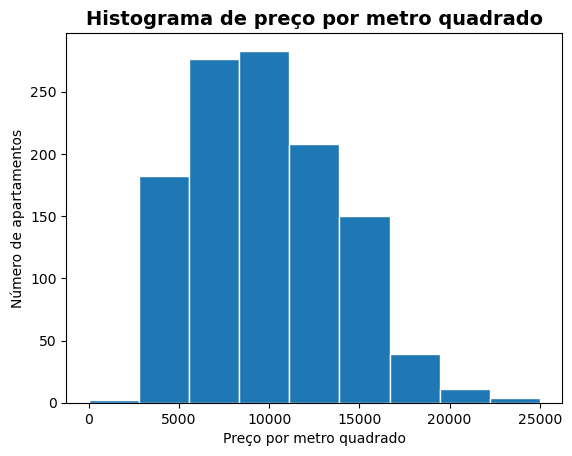

<Figure size 1000x600 with 0 Axes>

In [102]:
bin_edges = np.linspace(0, 25000, 10)
plt.hist(dfResidencial[['Metro quadrado']],bins = bin_edges, edgecolor='white')
plt.title("Histograma de preço por metro quadrado", fontsize=14, fontweight='bold')
plt.xlabel("Preço por metro quadrado")
plt.ylabel("Número de apartamentos")
plt.figure(figsize=(10, 6))
plt.savefig("figure1.png")

Calculando a mediana da nossa Amostra:

In [103]:
dfResidencial['Metro quadrado'].median()

9375.0

Com isso em mente, vamos utilizar o método de Bootstrap para obter um intervalo de confiança para a mediana:

In [104]:
#cria uma nova amostra a partir de uma permutação aleatória da amostra original
#e retorna a mediana do metro quadrado
def one_bootstrap_median(data, column):
    resample = data.sample(frac=1, replace=True)
    return resample[column].median()

In [105]:
#calcula a mediana da nova amostra
one_bootstrap_median(dfResidencial, 'Metro quadrado')

9463.21

In [114]:
# Gera uma lista de medianas de 50000 amostras bootstrap
num_repetitions = 10000
bstrap_medians = []
for i in np.arange(num_repetitions):
    bstrap_medians.append(one_bootstrap_median(dfResidencial, 'Metro quadrado'))

In [115]:
#calcula o intervalo que contém 95% das medianas calculadas acima
left = np.percentile(bstrap_medians, 2.5)
right = np.percentile(bstrap_medians, 97.5)

print(left, right)

9169.4 9696.97


Representando o intervalo através de um histograma:

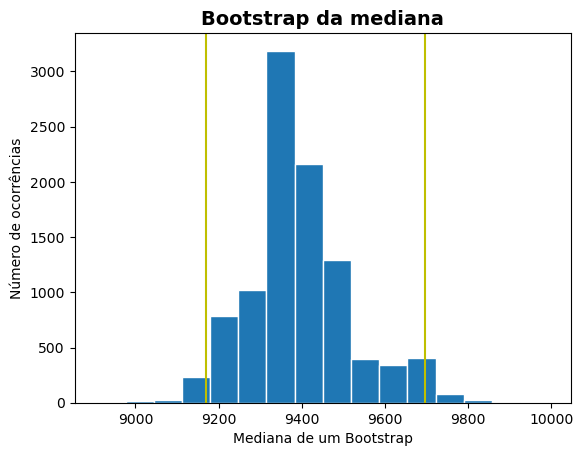

In [117]:
plt.hist(bstrap_medians, bins=16, edgecolor = 'white')
plt.title("Bootstrap da mediana", fontsize=14, fontweight='bold')
plt.xlabel("Mediana de um Bootstrap")
plt.ylabel("Número de ocorrências")
plt.axvline(x=left, color='y')
plt.axvline(x=right, color='y')
plt.savefig("figure2.png")

Chegamos a conclusão, portanto, que, com 95% de confiança, a mediana do valor do metro quadrado de um imóvel em Belo Horizonte está entre 9169.4 e 9696.97 reais. Vamos repetir o mesmo processo para a média:

In [118]:
dfResidencial['Metro quadrado'].mean()

9789.854614718615

In [121]:
#cria uma nova amostra a partir de uma permutação aleatória da amostra original
#e retorna a média do metro quadrado
def one_bootstrap_mean(data, column):
    resample = data.sample(frac=1, replace=True)
    return resample[column].mean()

In [120]:
# Gera uma lista de médias de 50000 amostras bootstrap
num_repetitions = 50000
bstrap_means = []
for i in np.arange(num_repetitions):
    bstrap_means.append(one_bootstrap_mean(dfResidencial, 'Metro quadrado'))

In [122]:
#calcula o intervalo que contém 95% das médias calculadas acima
left = round(np.percentile(bstrap_means, 2.5),2)
right = round(np.percentile(bstrap_means, 97.5),2)

print(left, right)

9562.44 10017.94


Representando o intervalo através de um histograma:

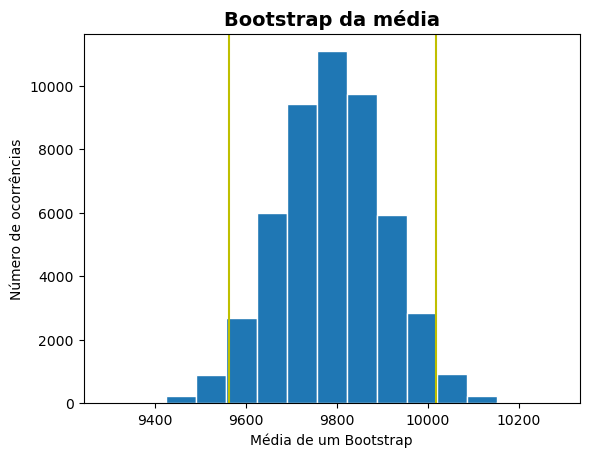

In [123]:
plt.hist(bstrap_means, bins=15, edgecolor = 'white')
plt.title("Bootstrap da média", fontsize=14, fontweight='bold')
plt.xlabel("Média de um Bootstrap")
plt.ylabel("Número de ocorrências")
plt.axvline(x=left, color='y')
plt.axvline(x=right, color='y')
plt.savefig("figure3.png")

Chegamos a conclusão, portanto, que, com 95% de confiança, a média do valor do metro quadrado de um imóvel em Belo Horizonte está entre 9562.44 e 10017.94 reais.

Agora vamos repetir o mesmo processo para apartamentos


Histograma dos preços do metro quadrado dos apartamentos

# TESTE DE HIPÓTESE

In [124]:
#importando o iqvu dos bairros
iqvu = pd.read_csv('iqvu_bh.csv')
iqvu = iqvu.rename(columns={'NOMEUP': 'Bairro'})
iqvu

,Bairro,IQVU
0,Abilio Machado,0.714309
1,Anchieta,0.755254
2,Antonio Carlos,0.709897
3,Bairro das Industrias,0.753676
4,Baleia,0.705870
...,...,...
93,Santa Lúcia,0.824468
94,Taquaril,0.535259
95,Tupi/Floramar,0.636245
96,Venda Nova,0.746811


In [125]:
#Calculando o preço médio por bairro
PrecoMedio = dfResidencial.groupby('Bairro')['Preço'].mean()
dfPrecoMedio = PrecoMedio.reset_index()
dfPrecoMedio['Bairro'] = dfPrecoMedio['Bairro'].str.strip()
dfPrecoMedio = dfPrecoMedio.rename(columns={'Preço': 'Preço médio'})
dfPrecoMedio

,Bairro,Preço médio
0,Alto Barroca,4.511745e+05
1,Anchieta,1.448283e+06
2,Barro Preto,9.295090e+05
3,Barroca,5.450000e+05
4,Belvedere,2.426875e+06
5,Boa Viagem,1.100000e+06
6,Buritis,8.046182e+05
7,CENTRO,4.842866e+05
8,Cachoeirinha,3.395000e+05
9,Carlos Prates,8.500000e+05


In [126]:
#Unido preço médio e iqvu
tabela = pd.merge(iqvu, dfPrecoMedio, on='Bairro')
print(tabela)

             Bairro      IQVU   Preço médio
0          Anchieta  0.755254  1.448283e+06
1       Barro Preto  0.856587  9.295090e+05
2           Barroca  0.765196  5.450000e+05
3         Belvedere  0.769293  2.426875e+06
4           Buritis  0.672025  8.046182e+05
5      Cachoeirinha  0.693678  3.395000e+05
6             Carmo  0.775673  1.259261e+06
7           Castelo  0.595462  3.993500e+05
8            CENTRO  0.798798  4.842866e+05
9          Cruzeiro  0.775936  8.881119e+05
10          Estoril  0.672025  3.500000e+05
11         Floresta  0.785570  5.609950e+05
12     Funcionários  0.804587  1.488775e+06
13        Gutierrez  0.765196  1.253246e+06
14          Lourdes  0.804587  1.605529e+06
15       Luxemburgo  0.765196  9.244890e+05
16       Ouro Preto  0.742575  4.925503e+05
17  Sagrada Família  0.785570  6.178697e+05
18   Santa Efigênia  0.725591  6.469175e+05
19       Santa Inês  0.794606  5.800000e+05
20     Santa Tereza  0.785570  5.541667e+05
21  Santo Agostinho  0.804587  1

***Estatística de Teste usando `pearsonr`***

In [127]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(tabela['IQVU'], tabela['Preço médio'])
correlation, p_value

(0.4489696092788279, 0.01129181195121177)

**Estatística de Teste, usando testes de permutação**

Correlação Observada: 0.4489696092788282
P-valor: 0.0105


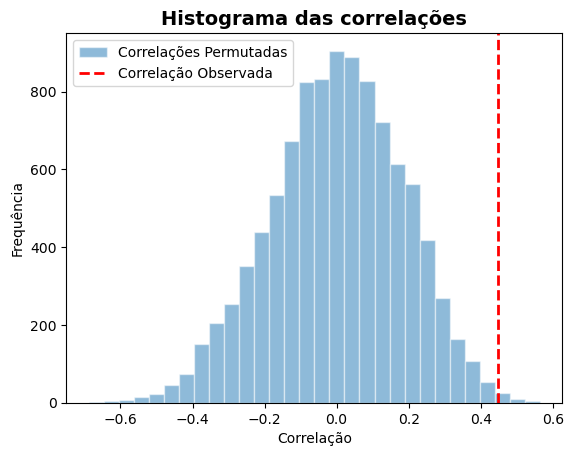

In [136]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

def perm_test(df, col1, col2, num_permutations):
    # calculate observed correlation
    observed_corr = df[col1].corr(df[col2])

    permuted_corrs = []

    for _ in range(num_permutations):
        # shuffle one of the columns
        shuffled_col = df[col1].sample(frac=1, replace=False).reset_index(drop=True)

        # compute the correlation with the shuffled data
        corr = shuffled_col.corr(df[col2])
        permuted_corrs.append(corr)

    p_value = (np.abs(permuted_corrs) >= np.abs(observed_corr)).mean()

    return observed_corr, p_value, permuted_corrs

observed_corr, p_value, permuted_corrs = perm_test(tabela, 'IQVU', 'Preço médio', num_permutations=10000)

print(f"Correlação Observada: {observed_corr}")
print(f"P-valor: {p_value}")

plt.hist(permuted_corrs, bins=30, alpha=0.5, label='Correlações Permutadas',edgecolor = 'white')
plt.title("Histograma das correlações", fontsize=14, fontweight='bold')
plt.axvline(observed_corr, color='red', linestyle='dashed', linewidth=2, label='Correlação Observada')
plt.xlabel('Correlação')
plt.ylabel('Frequência')
plt.legend()
plt.savefig("figure4.png")
plt.show()

Tabelo com a média por bairro com todos os tipos de imóveis


In [130]:
dfPrecoMedio_all = df.groupby('Bairro')['Preço'].mean().reset_index()
dfPrecoMedio_all = dfPrecoMedio.rename(columns={'Preço': 'Preço médio'})
dfPrecoMedio_all['Bairro'] = dfPrecoMedio_all['Bairro'].str.strip()
dfPrecoMedio_all

,Bairro,Preço médio
0,Alto Barroca,4.511745e+05
1,Anchieta,1.448283e+06
2,Barro Preto,9.295090e+05
3,Barroca,5.450000e+05
4,Belvedere,2.426875e+06
5,Boa Viagem,1.100000e+06
6,Buritis,8.046182e+05
7,CENTRO,4.842866e+05
8,Cachoeirinha,3.395000e+05
9,Carlos Prates,8.500000e+05


Merge iqvu e a tabela


In [131]:
tabela2 = pd.merge(iqvu, dfPrecoMedio_all, on='Bairro')
print(tabela2)

             Bairro      IQVU   Preço médio
0          Anchieta  0.755254  1.448283e+06
1       Barro Preto  0.856587  9.295090e+05
2           Barroca  0.765196  5.450000e+05
3         Belvedere  0.769293  2.426875e+06
4           Buritis  0.672025  8.046182e+05
5      Cachoeirinha  0.693678  3.395000e+05
6             Carmo  0.775673  1.259261e+06
7           Castelo  0.595462  3.993500e+05
8            CENTRO  0.798798  4.842866e+05
9          Cruzeiro  0.775936  8.881119e+05
10          Estoril  0.672025  3.500000e+05
11         Floresta  0.785570  5.609950e+05
12     Funcionários  0.804587  1.488775e+06
13        Gutierrez  0.765196  1.253246e+06
14          Lourdes  0.804587  1.605529e+06
15       Luxemburgo  0.765196  9.244890e+05
16       Ouro Preto  0.742575  4.925503e+05
17  Sagrada Família  0.785570  6.178697e+05
18   Santa Efigênia  0.725591  6.469175e+05
19       Santa Inês  0.794606  5.800000e+05
20     Santa Tereza  0.785570  5.541667e+05
21  Santo Agostinho  0.804587  1

Hipótese com todos os tipos de imóveis

Correlação Observeda: 0.4489696092788282
P-valor: 0.011


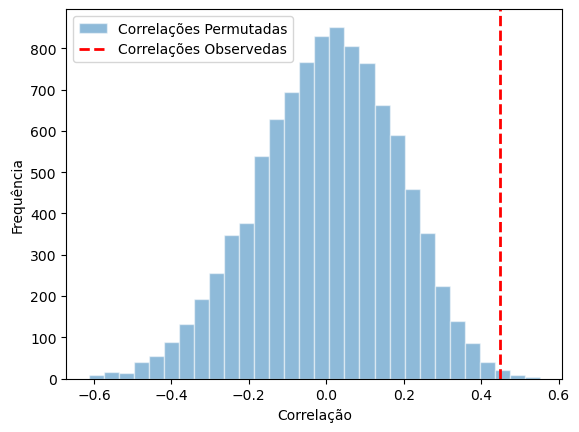

In [135]:
observed_corr2, p_value2, permuted_corrs2 = perm_test(tabela2, 'IQVU', 'Preço médio', num_permutations=10000)

print(f"Correlação Observeda: {observed_corr2}")
print(f"P-valor: {p_value2}")

plt.hist(permuted_corrs2, bins=30, alpha=0.5, label='Correlações Permutadas', edgecolor = 'white')
plt.axvline(observed_corr2, color='red', linestyle='dashed', linewidth=2, label='Correlações Observedas')
plt.xlabel('Correlação')
plt.ylabel('Frequência')
plt.legend()
plt.savefig("figure5.png")
plt.show()